# **THE PROFITABLE TUNE**
# Exploring Trends and Investment Opportunities in the Filipino Music Industry

### Author: Crystal Joy N. Macababbad
*Chemical Sales Engineer | Aspiring Data Scientist*

**Date Created:** August 2023

**Resources**

Dataset
https://www.kaggle.com/datasets/jcacperalta/spotify-daily-top-200-ph

Metadata:
https://developer.spotify.com/documentation/web-api/reference/get-audio-features

# **OVERVIEW OF THE PROBLEM**

Roxette, a Filipino-Korean music producer, wants to settle back in Manila after studying overseas. She is planning to invest her time and money in the Philippine music scene in whatever capacity. She wants to understand if there’s a specific type of music, specific artist that she should focus her efforts on. She also wanted to analyze if there was a change in music choices from 2017 - 2022.

# **OBJECTIVES**


Based on the client story, the following are the objectives in Data Analysis:

1.	Determine the interrelationship between various musical features.
2.	Analyze the distribution of song features.
3.	Evaluate trends over time in musical attributes.
4.	Identify the Top 10 genres in the Philippines.
5.	Identify the Top 10 Filipino Artists.
6.	Identify the most suitable Filipino artist to invest in and what genre.
7.	Identify the range of song features that are popular.


# **CHECKING THE COMPLETENESS OF THE DATA**

In [38]:
!pip install tabulate

In [39]:
#Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from tabulate import tabulate

In [40]:
#Import Datasets
df_daily_charts = pd.read_csv("ph_spotify_daily_charts.csv")
df_daily_charts_artists = pd.read_csv("ph_spotify_daily_charts_artists.csv")
df_daily_charts_tracks = pd.read_csv("ph_spotify_daily_charts_tracks.csv")

### **Spotify Daily Charts Dataset**

In [41]:
#Display the Columns,Rows
df_daily_charts.shape

(141561, 6)

In [42]:
#Display Chart info
df_daily_charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141561 entries, 0 to 141560
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        141561 non-null  object 
 1   position    141561 non-null  int64  
 2   track_id    141561 non-null  object 
 3   track_name  141550 non-null  object 
 4   artist      141550 non-null  object 
 5   streams     141560 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.5+ MB


In [43]:
#Display the first 5 rows
df_daily_charts.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236.0
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552.0
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720.0
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874.0
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656.0


### **Spotify Daily Charts Artist Dataset**

In [44]:
#Display the Columns,Rows
df_daily_charts_artists.shape

(988, 5)

In [45]:
#Display Chart info
df_daily_charts_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist_id        988 non-null    object
 1   artist_name      988 non-null    object
 2   total_followers  988 non-null    int64 
 3   genres           988 non-null    object
 4   popularity       988 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.7+ KB


In [46]:
#Display the first 5 rows
df_daily_charts_artists.head()

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,47387027,"['dance pop', 'pop']",89
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,11471232,"['pop', 'talent show', 'uk pop']",82
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,20036566,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",81
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,40125006,['pop'],86
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,8535540,"['dance pop', 'pop', 'post-teen pop']",73


### **Spotify Daily Charts Tracks Dataset**

In [47]:
#Display the Columns,Rows
df_daily_charts_tracks.shape

(4768, 19)

In [48]:
#Display Chart info
df_daily_charts_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4768 non-null   object 
 1   track_name        4763 non-null   object 
 2   artist_id         4768 non-null   object 
 3   artist_name       4763 non-null   object 
 4   album_id          4768 non-null   object 
 5   duration          4768 non-null   int64  
 6   release_date      4768 non-null   object 
 7   popularity        4768 non-null   int64  
 8   danceability      4767 non-null   float64
 9   energy            4767 non-null   float64
 10  key               4767 non-null   float64
 11  loudness          4767 non-null   float64
 12  mode              4767 non-null   float64
 13  speechiness       4767 non-null   float64
 14  acousticness      4767 non-null   float64
 15  instrumentalness  4767 non-null   float64
 16  liveness          4767 non-null   float64


In [49]:
#Display the first 5 rows
df_daily_charts_tracks.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,87,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


# **DATA PREPROCESSING**

# **Handling Missing Values**

### **Spotify Daily Charts Dataset**

In [50]:
#Display Nulls in the Dataset
df_daily_charts.isnull().sum()

date           0
position       0
track_id       0
track_name    11
artist        11
streams        1
dtype: int64

In [51]:
#Display the Percentage of Null

null_counts_per_column = df_daily_charts.isnull().sum()
total_rows = len(df_daily_charts)

# Calculate the percentage of null values per column
percentage_null_per_column = (null_counts_per_column / total_rows) * 100

# Create a DataFrame to store the results
null_percentage_per_column_df = pd.DataFrame({'Percentage Null': percentage_null_per_column})

# Convert the percentages to string format with '%' sign and 4 decimal places
null_percentage_per_column_df['Percentage Null'] = null_percentage_per_column_df['Percentage Null'].map("{:.4f}%".format)

# Display the DataFrame
print(null_percentage_per_column_df)



           Percentage Null
date               0.0000%
position           0.0000%
track_id           0.0000%
track_name         0.0078%
artist             0.0078%
streams            0.0007%


### Dropping rows with missing values, as it is only a small percentage of the dataset and won't take away a lot of information from the data.

In [52]:
# Drop rows with missing values
df_daily_charts = df_daily_charts.dropna()
df_daily_charts.isnull().sum()

date          0
position      0
track_id      0
track_name    0
artist        0
streams       0
dtype: int64

### **Spotify Daily Charts Artist Dataset**

In [53]:
#Display Nulls in the Dataset
df_daily_charts_artists.isnull().sum()

artist_id          0
artist_name        0
total_followers    0
genres             0
popularity         0
dtype: int64

### No nulls in this dataset

### **Spotify Daily Charts Tracks**

In [54]:
#Display Nulls in the Dataset
df_daily_charts_tracks.isnull().sum()

track_id            0
track_name          5
artist_id           0
artist_name         5
album_id            0
duration            0
release_date        0
popularity          0
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
dtype: int64

In [55]:
#Display the Percentage of Null

null_counts_per_column = df_daily_charts_tracks.isnull().sum()
total_rows = len(df_daily_charts)

# Calculate the percentage of null values per column
percentage_null_per_column = (null_counts_per_column / total_rows) * 100

# Create a DataFrame to store the results
null_percentage_per_column_df = pd.DataFrame({'Percentage Null': percentage_null_per_column})

# Convert the percentages to string format with '%' sign and 4 decimal places
null_percentage_per_column_df['Percentage Null'] = null_percentage_per_column_df['Percentage Null'].map("{:.4f}%".format)

# Display the DataFrame
print(null_percentage_per_column_df)

                 Percentage Null
track_id                 0.0000%
track_name               0.0035%
artist_id                0.0000%
artist_name              0.0035%
album_id                 0.0000%
duration                 0.0000%
release_date             0.0000%
popularity               0.0000%
danceability             0.0007%
energy                   0.0007%
key                      0.0007%
loudness                 0.0007%
mode                     0.0007%
speechiness              0.0007%
acousticness             0.0007%
instrumentalness         0.0007%
liveness                 0.0007%
valence                  0.0007%
tempo                    0.0007%


### Dropping rows with missing values, as it is only a small percentage of the dataset and won't take away a lot of information from the data.

In [56]:
# Drop rows with missing values
df_daily_charts_tracks = df_daily_charts_tracks.dropna()
df_daily_charts_tracks.isnull().sum()

track_id            0
track_name          0
artist_id           0
artist_name         0
album_id            0
duration            0
release_date        0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

### **Checking the date format**

In [57]:
# Convert date to datetime format
df_daily_charts['date'] = pd.to_datetime(df_daily_charts['date'], errors='coerce')
df_daily_charts_tracks['release_date'] = pd.to_datetime(df_daily_charts_tracks['release_date'], errors='coerce')

In [58]:
print(df_daily_charts['date'])

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
141555   2018-12-12
141556   2018-12-12
141557   2018-12-12
141558   2018-12-12
141559   2018-12-12
Name: date, Length: 141550, dtype: datetime64[ns]


In [59]:
print(df_daily_charts_tracks['release_date'])

0      2016-11-17
1      2016-10-28
2      2016-07-29
3      2016-09-29
4      2016-10-11
          ...    
4763   2023-03-27
4764   2021-08-15
4765   2023-03-31
4766   2023-03-31
4767   2023-03-16
Name: release_date, Length: 4762, dtype: datetime64[ns]


### **Convert the durtaions from milliseconds to minutes**

In [60]:
df_daily_charts_tracks['duration'] = df_daily_charts_tracks['duration']/60000

### **Separating the Diffrent Genres per Artist**

In [61]:
genre_data = []

for _, row in df_daily_charts_artists.iterrows():
    # Extract artist information
    artist_info = {
        'artist_id': row['artist_id'],
        'artist_name': row['artist_name'],
        'total_followers': row['total_followers'],
        'popularity': row['popularity']
    }

    # Extract and clean genres, then create dictionaries for each genre
    cleaned_genres = [genre.strip().replace("'", "") for genre in row['genres'][1:-1].split(",")]
    for genre in cleaned_genres:
        genre_data.append({**artist_info, 'genre': genre})

# Create DataFrame for genre analysis
df_daily_charts_artists_mod = pd.DataFrame(genre_data)


In [62]:
df_daily_charts_artists_mod.head()

,artist_id,artist_name,total_followers,popularity,genre
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,47387027,89,dance pop
1,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,47387027,89,pop
2,4IWBUUAFIplrNtaOHcJPRM,James Arthur,11471232,82,pop
3,4IWBUUAFIplrNtaOHcJPRM,James Arthur,11471232,82,talent show
4,4IWBUUAFIplrNtaOHcJPRM,James Arthur,11471232,82,uk pop


### **Saving the modified datasets into .csv file**

In [63]:
# Save df_daily_charts to CSV
df_daily_charts.to_csv('daily_charts.csv', index=False)

# Save df_daily_charts_artists to CSV
df_daily_charts_artists_mod.to_csv('daily_charts_artists.csv', index=False)

# Save df_daily_charts_tracks to CSV
df_daily_charts_tracks.to_csv('daily_charts_tracks.csv', index=False)


# **DATA ANALYSIS**

### **Correlation Matrix**

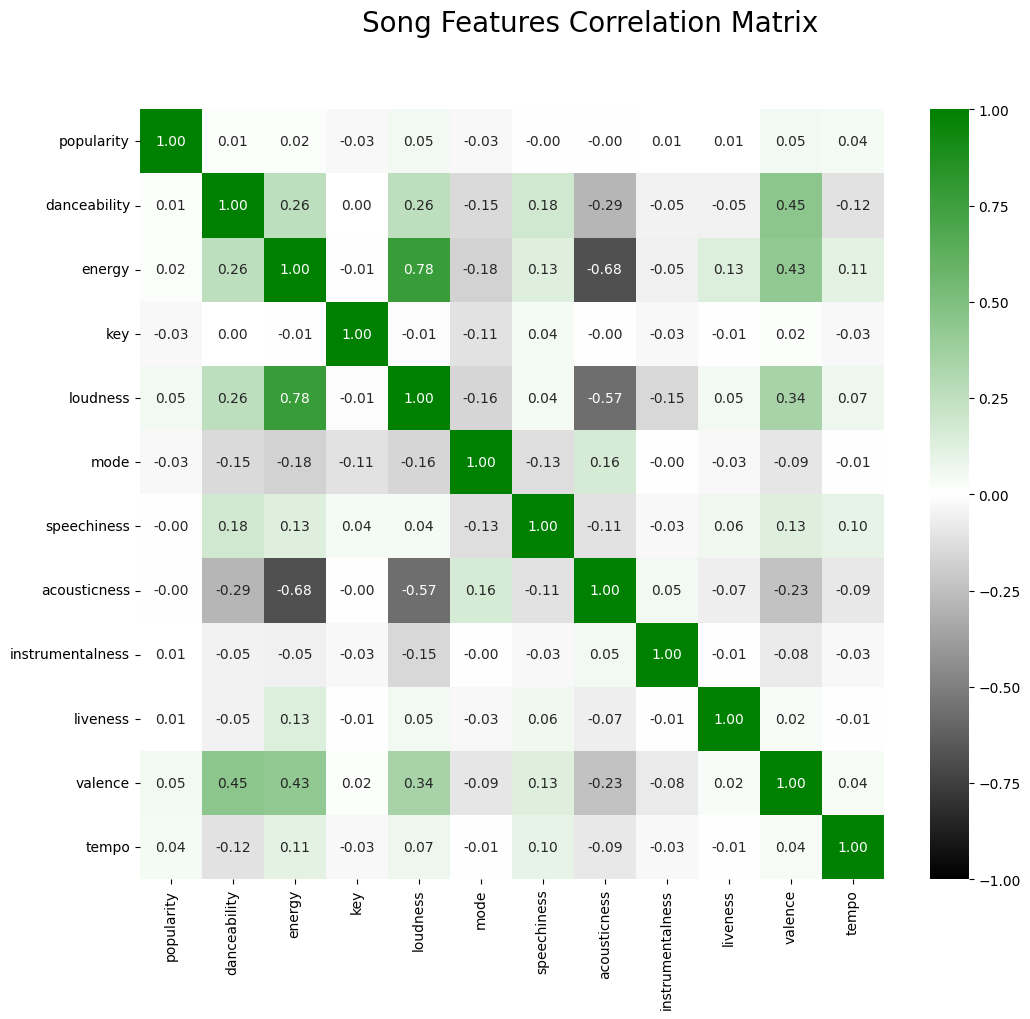

In [64]:
# Select specific columns for Correlation Matrix
selected_columns = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Make a DataFrame for the selected columns
selected_df = df_daily_charts_tracks[selected_columns]

# Compute the correlation matrix for the selected columns
correlation_matrix = selected_df.corr()

# Define a custom colormap where positive values are green, zero values are white, and negative values are black
colors = [(0, 0, 0), (1, 1, 1), (0, 0.5, 0)]  # Black, White, Green
cmap = LinearSegmentedColormap.from_list('green_white_black', colors, N=256)

# Increase the size of the plot
plt.figure(figsize=(12, 10))

# Generate heatmap for correlation matrix with the custom colormap
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f", vmin=-1, vmax=1)

# Add space between title and graph
plt.suptitle('Song Features Correlation Matrix', fontsize=20, y=0.98, ha='center')  # Set the title, increase font size, and center it
plt.show()

# Based on the Correlation Matrix:

### •	There is no correlation between the song features & popularity.

### •	Loudness & energy are the two features with the strongest positive correlation.

### •	Acousticness & energy are the two features with the strongest negative correlation.

### **Histogram**

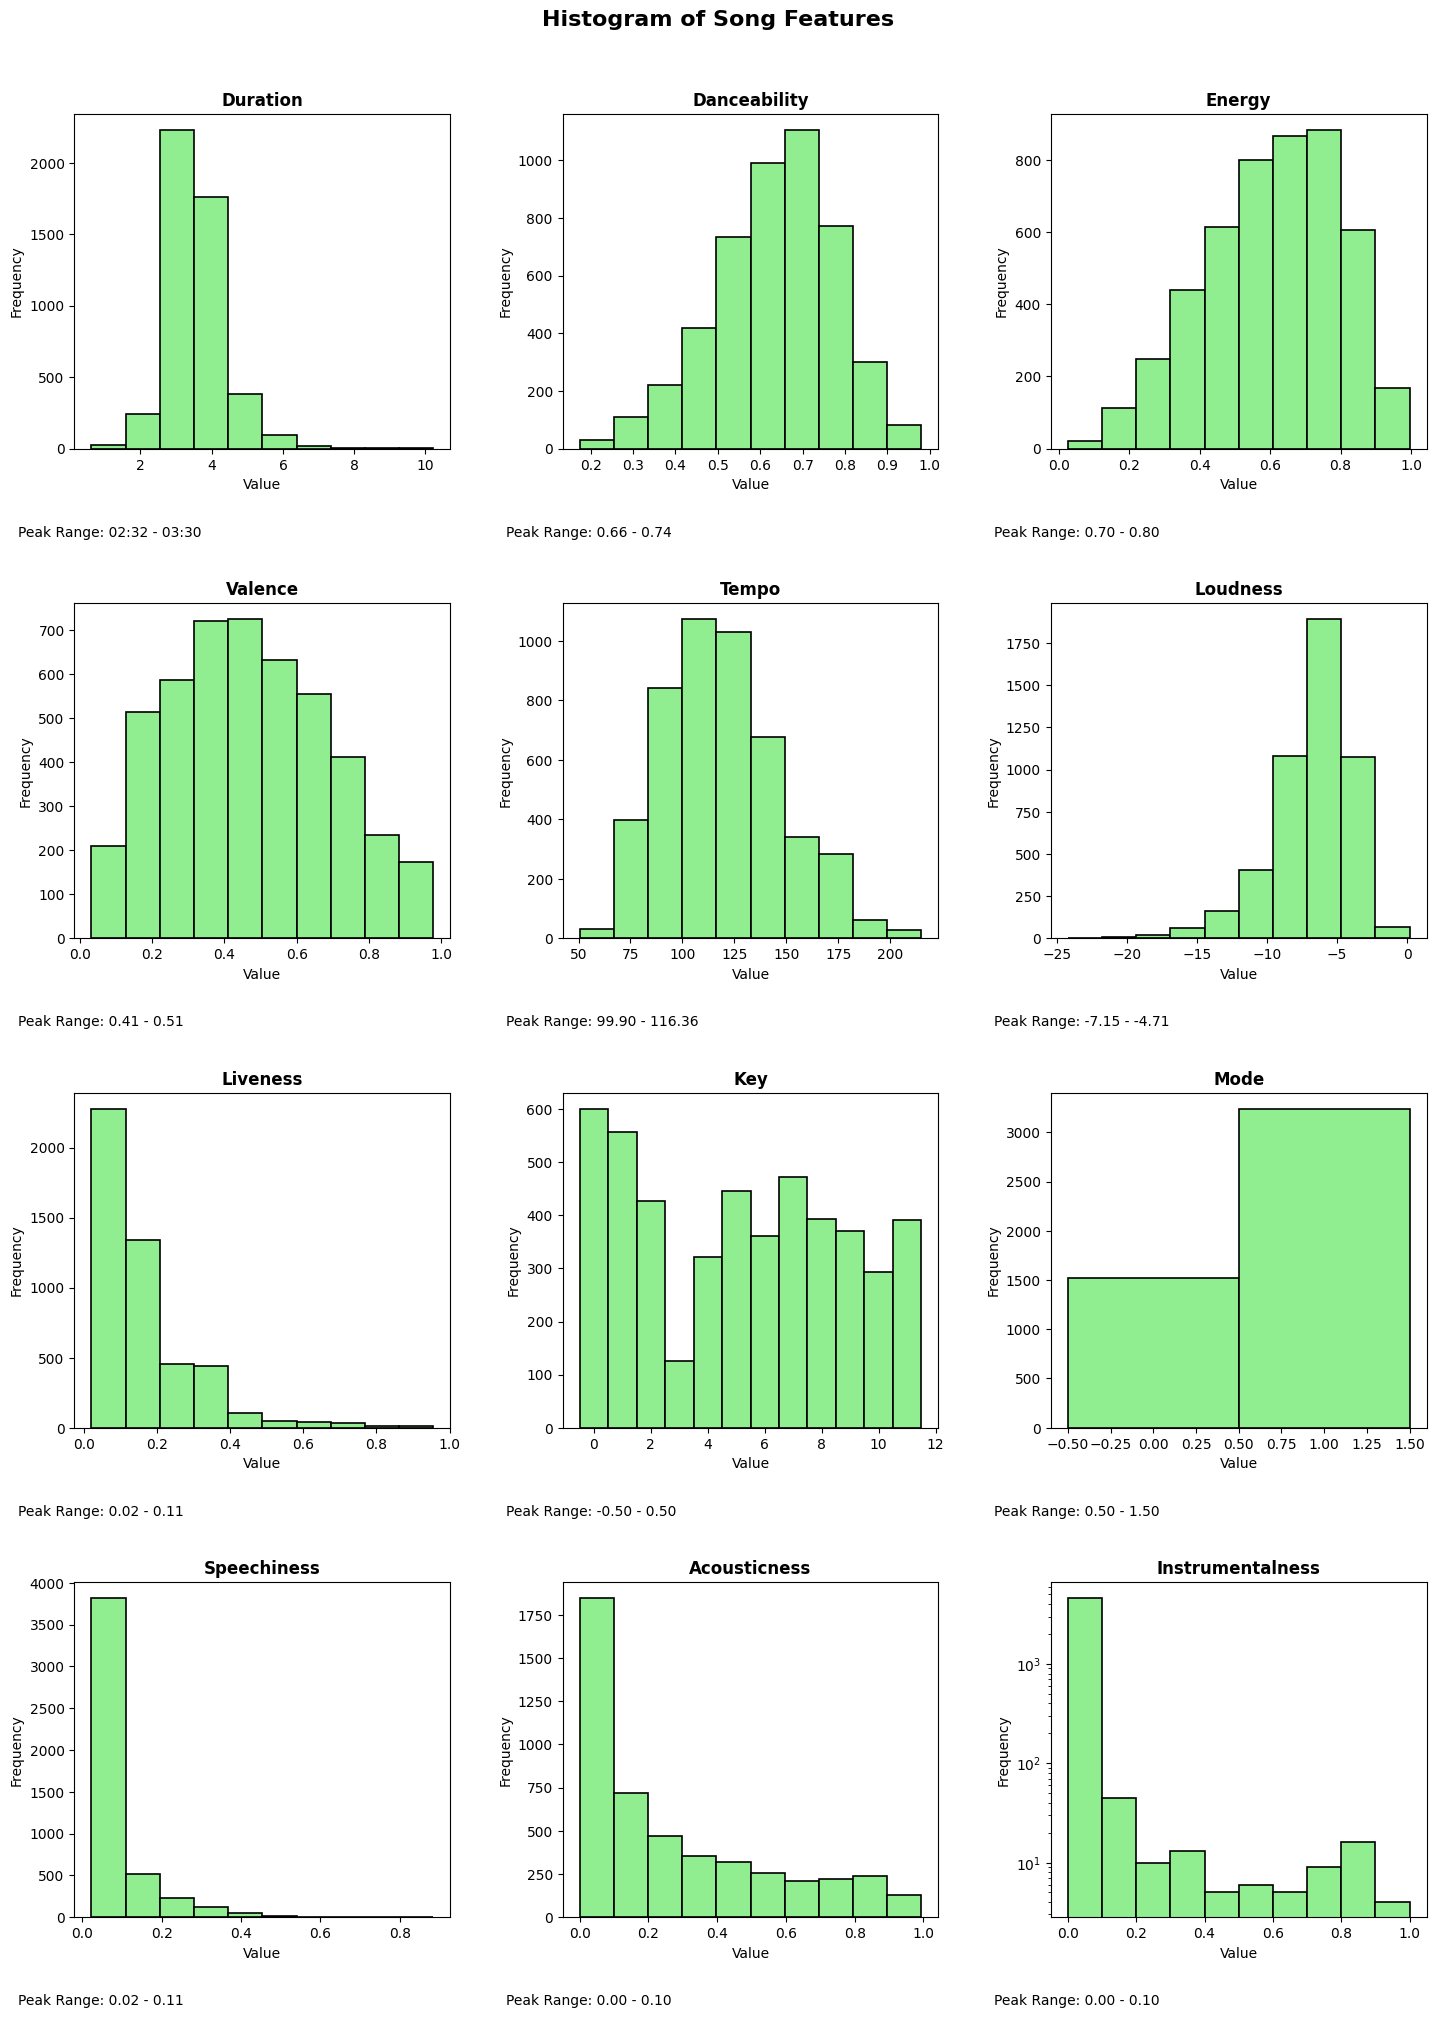

In [65]:
# Select specific columns for the Histograms
selected_columns = ['duration', 'danceability', 'energy', 'valence', 'tempo', 'loudness', 'liveness', 'key', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness']

# Make a DataFrame for the selected columns
selected_df = df_daily_charts_tracks[selected_columns]

# Calculate the number of rows needed for the plot grid
num_columns = len(selected_columns)
num_plots_per_row = 3
num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Calculate the number of rows needed for the plot grid

# Set up the plot grid
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))  # Create subplots

# Flatten the axes array if it's not already flat
if num_rows > 1:
    axes = axes.flatten()

# Plot histogram for each column
for i, column in enumerate(selected_columns):
    ax = axes[i] if num_rows > 1 else axes  # Select the appropriate subplot
    if column in ['key', 'mode']:  # for discrete variables, set bins to align with values
        bins = np.arange(selected_df[column].min() - 0.5, selected_df[column].max() + 1.5, 1)
    elif column == 'instrumentalness':  # adjust bin width for 'instrumentalness'
        bins = np.arange(0, 1.1, 0.1)
        ax.set_yscale('log')  # Set y-axis scale to logarithmic for 'instrumentalness' histogram
    else:
        bins = 10  # default bin width
    frequencies, bin_edges, _ = ax.hist(selected_df[column], bins=bins, color='lightgreen', edgecolor='black', linewidth=1.2)  # Ensure linewidth is set to reduce gaps
    peak_bin_index = np.argmax(frequencies)  # Find the index of the peak bin
    peak_bin_range = (bin_edges[peak_bin_index], bin_edges[peak_bin_index + 1])  # Calculate the peak bin range

    # Format peak bin range value
    if column == 'duration':
        peak_minutes, peak_seconds = divmod(peak_bin_range[0] * 60, 60)
        peak_minutes_next, peak_seconds_next = divmod(peak_bin_range[1] * 60, 60)
        peak_bin_range_str = f"{int(peak_minutes):02d}:{int(peak_seconds):02d} - {int(peak_minutes_next):02d}:{int(peak_seconds_next):02d}"
    else:
        peak_bin_range_str = f"{peak_bin_range[0]:.2f} - {peak_bin_range[1]:.2f}"

    ax.set_title(column.capitalize(), fontweight='bold')  # Set title for the subplot with proper capitalization and bold font
    ax.set_xlabel('Value')  # Set x-axis label
    ax.set_ylabel('Frequency')  # Set y-axis label
    ax.text(-0.15, -0.25, f"Peak Range: {peak_bin_range_str}", transform=ax.transAxes, ha='left', va='center')  # Display peak bin range below the histogram on the left side

# Remove any unused subplots
for j in range(num_columns, num_rows * num_plots_per_row):
    axes[j].remove()

# Adjust layout
plt.tight_layout(pad=3.0)  # Increase the padding between subplots

plt.suptitle('Histogram of Song Features', fontsize=16, fontweight='bold', y=1.02)

plt.show()


# Based on the Histograms, we can observe the following:

### •	Energy, danceability & loudness are slightly skewed to the right.

### •	Tempo, valence & duration are slightly skewed to the left.

### •	Mode 1 is more favored than mode 0.

### •	Songs with duration ranging from 2:32  to 3:30 are popular with listeners.

### •	Majority of the tracks have a loudness level ranging from -7.15 dB to -4.71 dB.

### •	Songs with a low level of speechiness are highly favored by the listeners.


### **Time Series**

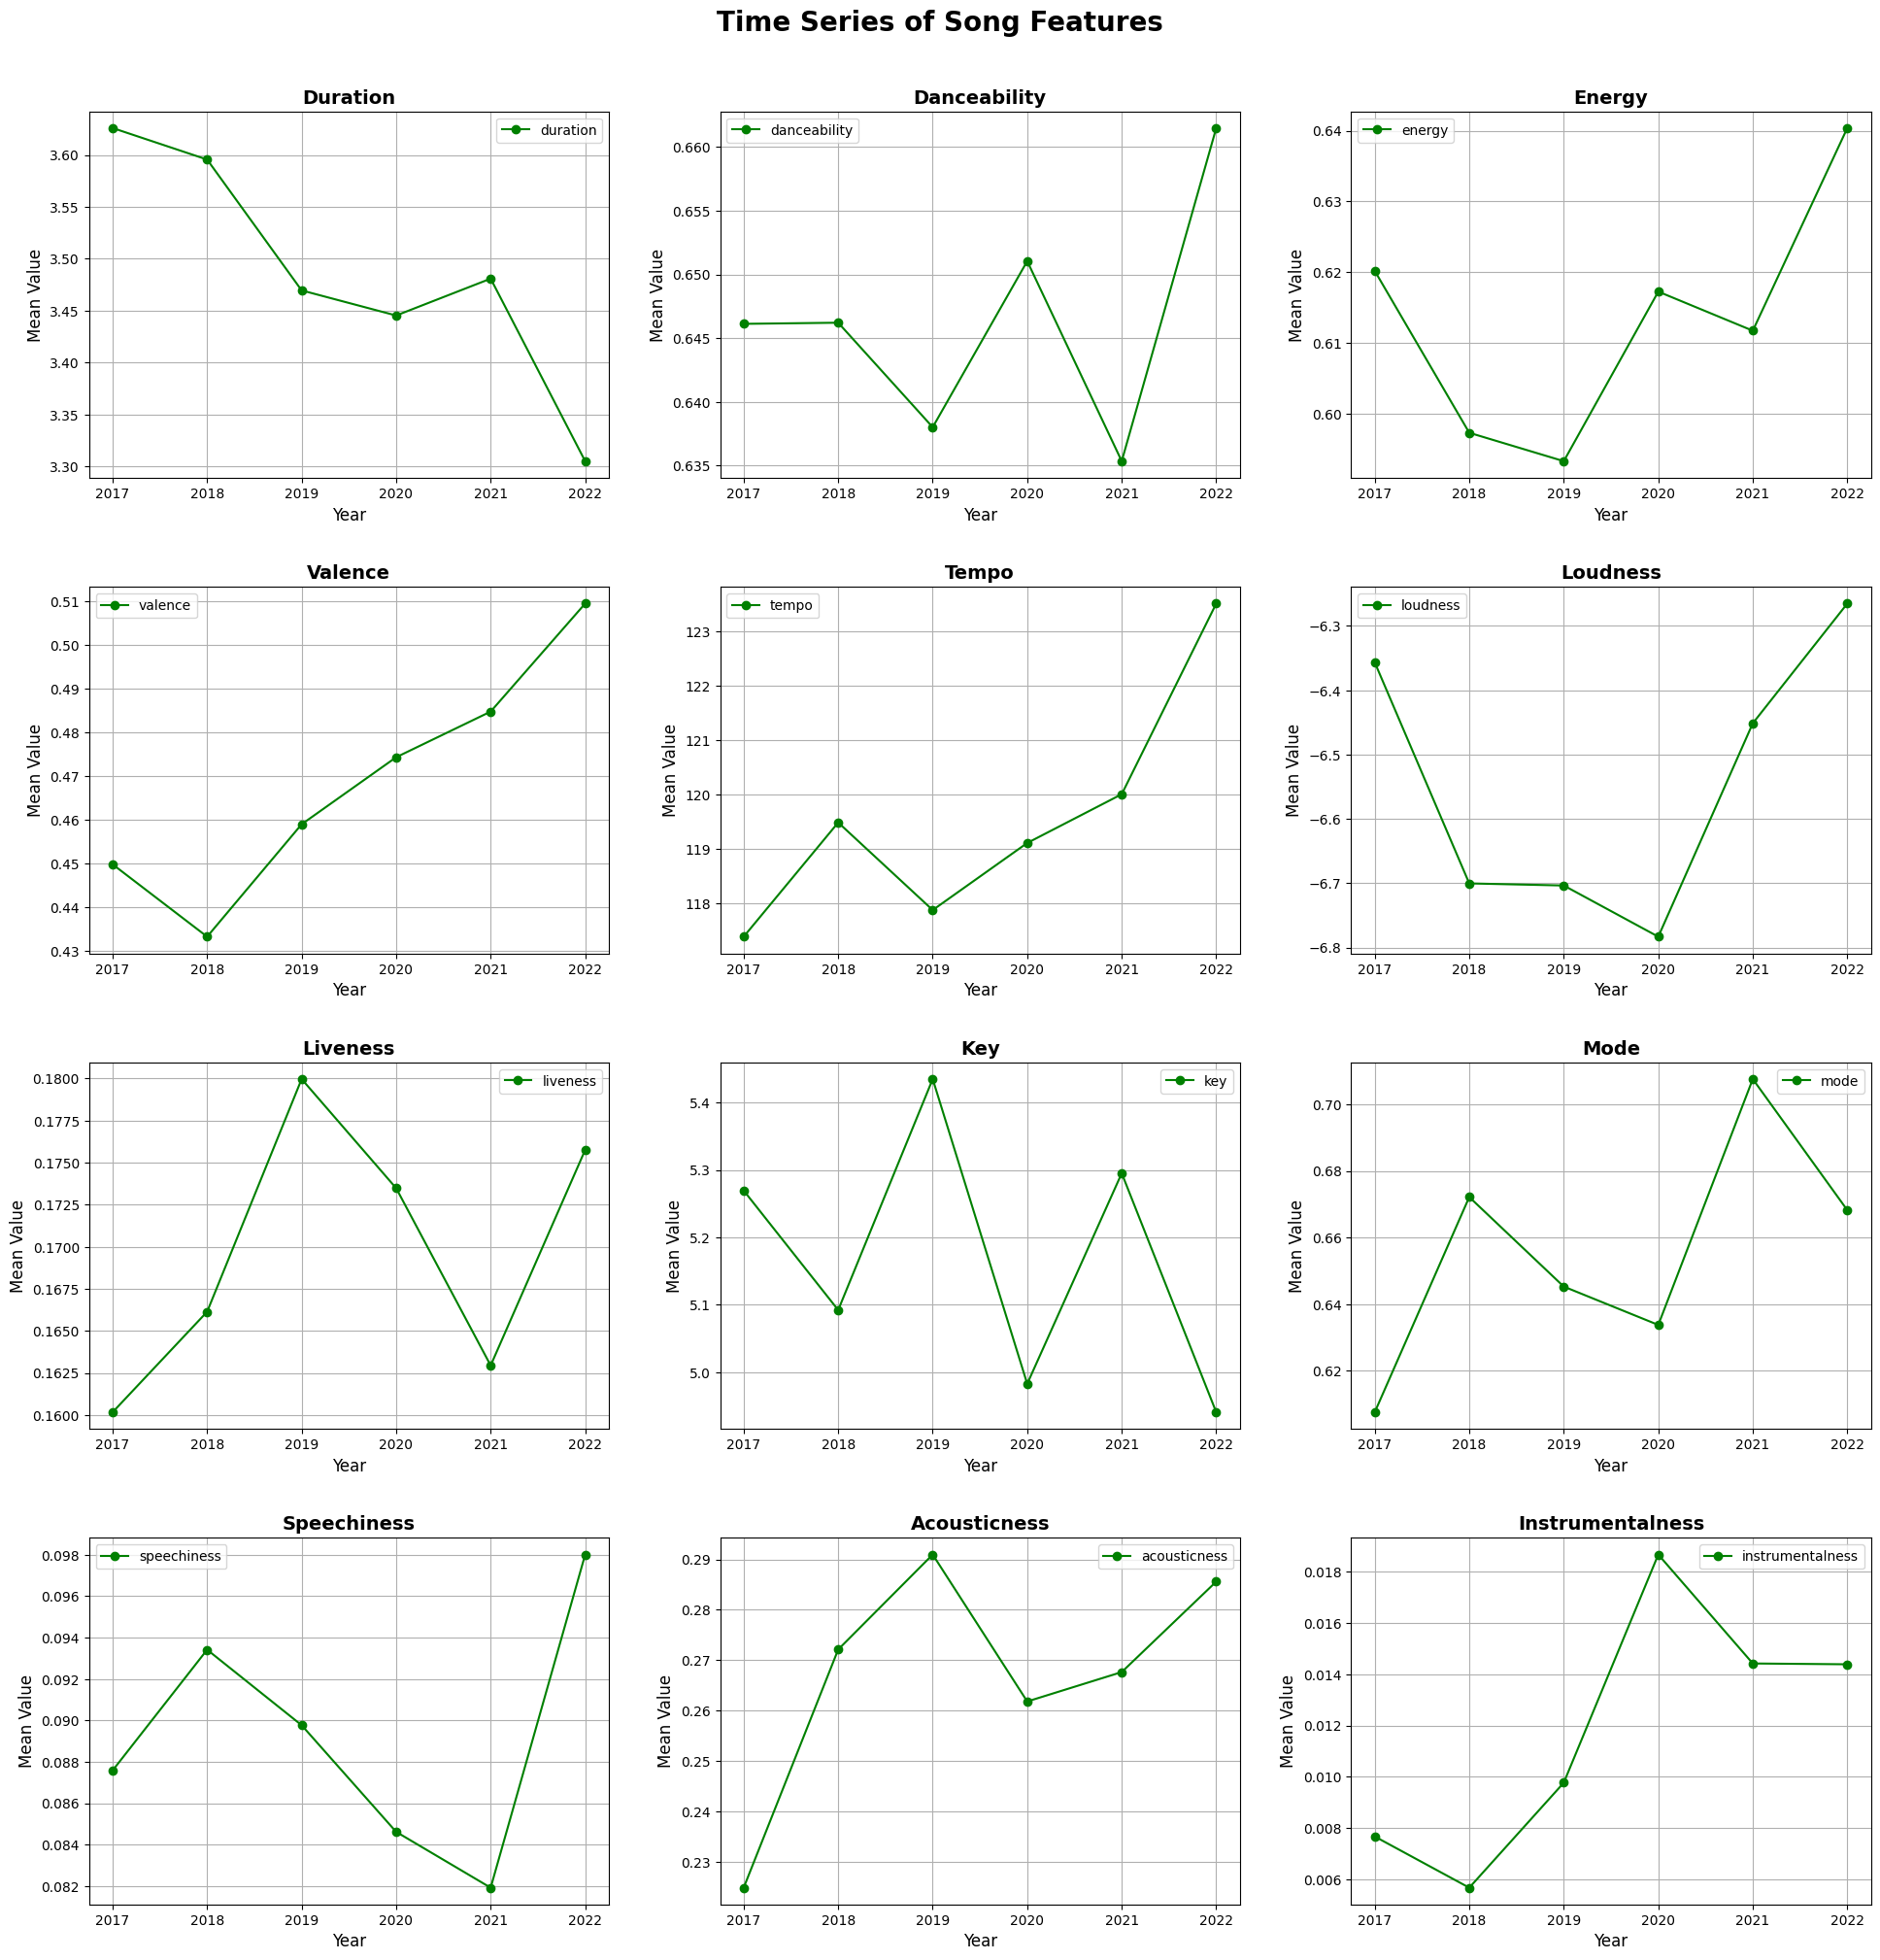

In [66]:
#Release_date is the column representing time
date_column = 'release_date'

# Convert the 'release_date' column to datetime if it's not already in datetime format
df_daily_charts_tracks['release_date'] = pd.to_datetime(df_daily_charts_tracks['release_date'])

# Extract year from the release_date column
df_daily_charts_tracks['year'] = df_daily_charts_tracks[date_column].dt.year

# Filter the DataFrame to include only data from the years 2017 to 2022
filtered_df = df_daily_charts_tracks[(df_daily_charts_tracks['year'] >= 2017) & (df_daily_charts_tracks['year'] <= 2022)]

# Define columns for which you want to create time series plots
columns_to_plot = ['duration', 'danceability', 'energy', 'valence', 'tempo', 'loudness',
                   'liveness', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness']

# Calculate number of rows needed for the plot grid
num_columns = len(columns_to_plot)
num_plots_per_row = 3
num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row

# Plot time series graphs for each column
plt.figure(figsize=(20, 5*num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_plots_per_row, i)
    # Group by year and calculate the mean for the current column
    yearly_mean = filtered_df.groupby('year')[column].mean()

    # Plot time series for the current column with green color
    plt.plot(yearly_mean.index, yearly_mean, marker='o', color='green', label=column)
    plt.title(column.capitalize(), fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Mean Value', fontsize=12)
    plt.legend()
    plt.grid(True)

# Adjust layout
plt.tight_layout(pad=3.0)  # Increase the padding between subplots

plt.suptitle('Time Series of Song Features', fontsize=20, fontweight='bold', y=1.02)

plt.show()


# In the time series, these are the most noticeable trends:

  ### •	Energy, danceability, valence & tempo levels are increasing with time.

  ### •	Duration levels are decreasing with time



### **Relationship of Popularity & Followers**

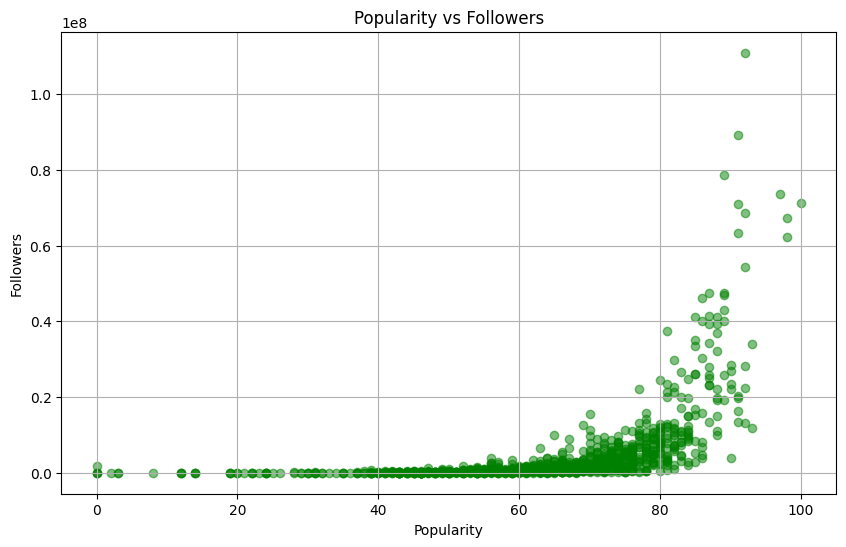

In [67]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_daily_charts_artists['popularity'], df_daily_charts_artists['total_followers'], color='green', alpha=0.5)
plt.title('Popularity vs Followers')
plt.xlabel('Popularity')
plt.ylabel('Followers')
plt.grid(True)
plt.show()

### Popularity & Followers have a positive exponential relationship which means that as the popularity increases the followers exponentially increase.

### **Top 10 Genres in the Philippines**

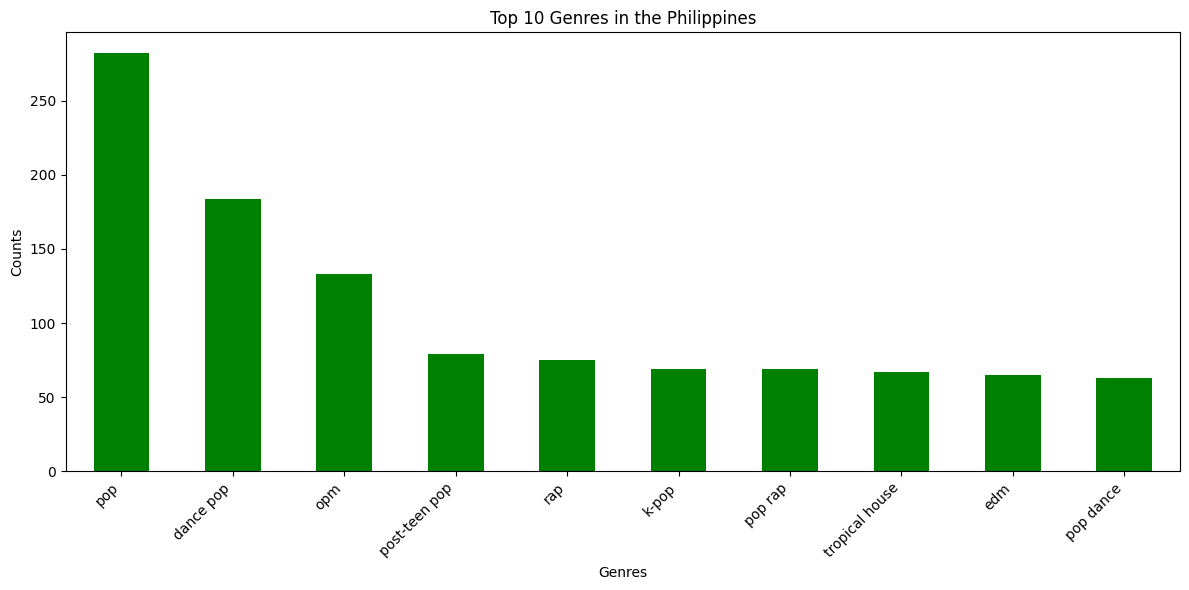

In [68]:
#df_daily_charts_artists_mod is the DataFrame containing 'genre' column

# Count occurrences of each genre
genre_counts = df_daily_charts_artists_mod['genre'].value_counts()

# Select top 11 genres
top_11_genres = genre_counts.head(11)

# Filter out entries with empty genre labels
top_11_genres = top_11_genres[top_11_genres.index != '']

# Plot
plt.figure(figsize=(12, 6))  # Adjusted width to accommodate labels
top_11_genres.plot(kind='bar', color='green')
plt.title('Top 10 Genres in the Philippines')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### The top music Genre in the Philippines is Pop.

### **Top 10 Filipino Artist in the Philippines**

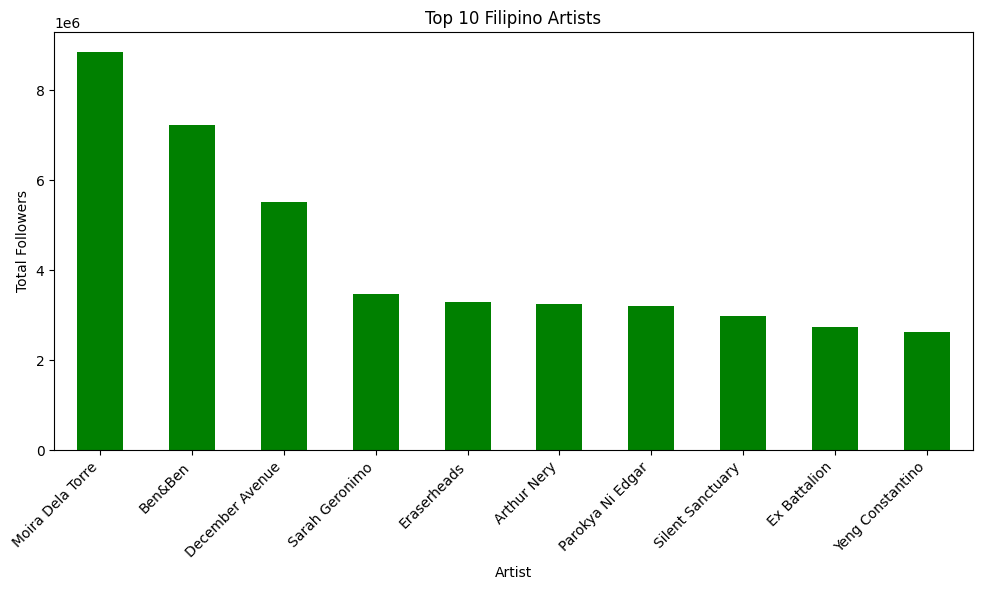

In [69]:
#df_daily_charts_artists_mod is the DataFrame containing 'artist_name', 'genre', and 'total_followers' columns

# Filter the DataFrame for the OPM genre
opm_artists = df_daily_charts_artists_mod[df_daily_charts_artists_mod['genre'] == 'opm']

# Group by artist and sum the total followers
opm_artist_followers = opm_artists.groupby('artist_name')['total_followers'].sum()

# Get the top 10 OPM artists with the most total followers
top_10_opm_artists = opm_artist_followers.nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_10_opm_artists.plot(kind='bar', color='green')
plt.title('Top 10 Filipino Artists')
plt.xlabel('Artist')
plt.ylabel('Total Followers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### The top Filipino Artist in the Philippines is Moira Dela Torre who sings the OPM genre.

### **Top 10 Pop Artist**

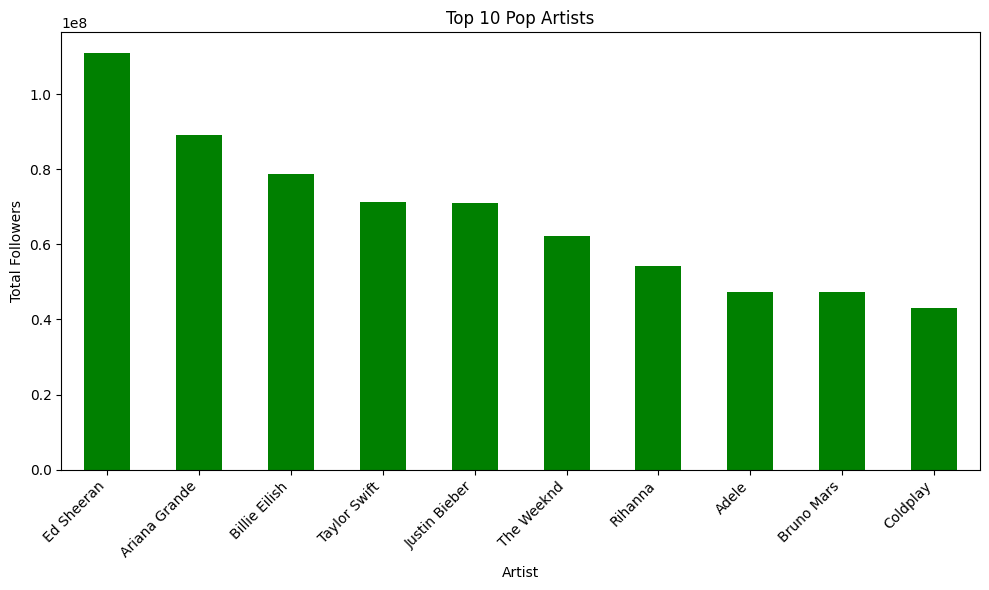

In [70]:
#df_daily_charts_artists_mod is the DataFrame containing 'artist_name', 'genre', and 'total_followers' columns

# Filter the DataFrame for the Pop genre
pop_artists = df_daily_charts_artists_mod[df_daily_charts_artists_mod['genre'] == 'pop']

# Group by artist and sum the total followers
pop_artist_followers = pop_artists.groupby('artist_name')['total_followers'].sum()

# Get the top 10 Pop artists with the most total followers
top_10_pop_artists = pop_artist_followers.nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_10_pop_artists.plot(kind='bar', color='green')  # Setting the color to green
plt.title('Top 10 Pop Artists')
plt.xlabel('Artist')
plt.ylabel('Total Followers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### The top Pop Artist in the Philippines is Ed Sheeran with 110 million followers.



# **CONCLUSION**

### Roxette should choose the top-followed Filipino Artist with an OPM genre which is **Moira Dela Torre**.

### Pushing through with a Pop Genre which is the top genre & choosing an artist below the Top 10 threshold of the Philippines, is a gamble. The top players of the Pop genre are from the US with a huge following and are also very popular here in the country.

### Based on the Histograms here is the range of the song features that are popular with Spotify listeners:


### **Duration**  2:32 to 3:30

### **Danceability**  0.66 to 0.74

### **Energy**  0.7 to 0.8

### **Valence** 0.41 to 0.51

### **Tempo** 99.90 bpm to 116.36 bpm

### **Loudness**  -7.15 dB to -4.71 dB

### **Liveness**  0.02 to 0.11

### **Mode**  1

### **Speechness**  0.02 to 0.11

### **Acousticness**  0.0 to 0.10

### **Instrumental**  0.0 to 0.10


# **RECOMMENDATION**

### To further increase the likelihood of the popularity of Roxette’s future-produced music with Moira Dela Torre, a detailed case study of the OPM genre is needed.

### Moreover, I highly suggest using machine learning algorithms since these algorithms can analyze vast amounts of data with accuracy & efficiency.

### Finally,  since music trends & preferences evolve over time, it is highly recommended that the data sets are regularly updated to ensure the accuracy of the predictions.

